<a href="https://colab.research.google.com/github/NishithaThimmappa/Coursera_projects/blob/main/Visualizing_Filters_of_a_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizing Filters of a Convolutional Neural Network

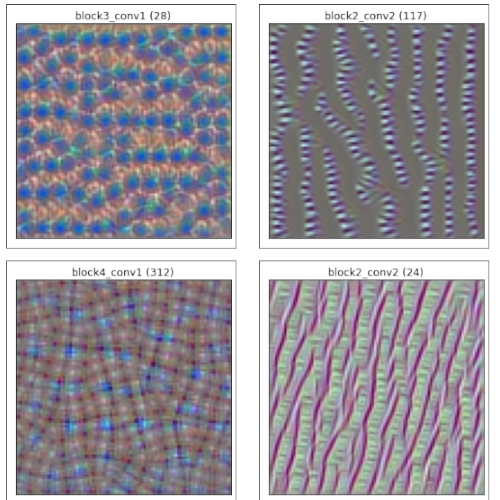

## Task 2: Downloading the Model

In [2]:
import tensorflow as  tf
import random
import matplotlib.pyplot as plt

print('Tensorflow version', tf.__version__)

Tensorflow version 2.7.0


In [ ]:
model=tf.keras.applications.vgg16.VGG16(
    include_top=False, weights='imagenet',
    input_shape=(96,96,3))

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

## Task 3: Get Layer Output

In [ ]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [ ]:
def create_image():
  return tf.random.uniform((96,96,3),minval=-0.5, maxval=0.5)

def plot_image(image, title='random'):
  image=image-tf.math.reduce_min(image)
  image=image/tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(random)
  plt.show()


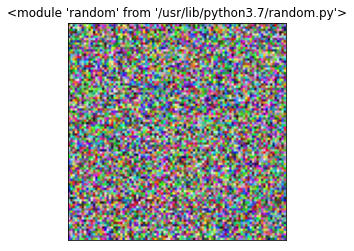

In [ ]:
image=create_image()
plot_image(image)

## Task 5: Training Loop

In [ ]:
def visulaize_filter(layer_name, f_index=None, iters=50):
  submodel=get_submodel(layer_name)
  num_filters=submodel.output.shape[-1]

  if f_index is None:
    f_index=random.randint(0, num_filters-1)
  assert num_filters >f_index, 'f_index is out of bounds'

  image=create_image()
  verbose_step=int(iters/10)

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out=submodel(tf.expand_dims(image, axis=0))[:,:,:,f_index]
      loss=tf.math.reduce_mean(out)
    grads=tape.gradient(loss, image)
    grads=tf.math.l2_normalize(grads)
    image+=grads*10

    if (i+1)% verbose_step==0:
      print(f'Iteeration: {i+1}, loss:{loss.numpy():4f}')
  plot_image(image, f'{layer_name}, {f_index}')



## Task 6: Final Results

In [ ]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


Iteeration: 10, loss:50.116859
Iteeration: 20, loss:80.597084
Iteeration: 30, loss:117.471664
Iteeration: 40, loss:159.618042
Iteeration: 50, loss:204.231445
Iteeration: 60, loss:249.834717
Iteeration: 70, loss:296.177734
Iteeration: 80, loss:342.926208
Iteeration: 90, loss:390.104858
Iteeration: 100, loss:437.488434


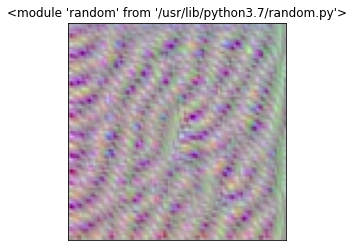

In [ ]:
layer_name='block3_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visulaize_filter(layer_name, iters=100)